In [1]:
import Pkg
Pkg.activate("../../../.")
include("../../../LogLoss/RealRealHighDimension.jl")
include("../../../Interpolation/ForecastingMainNew.jl");

  Activating project at `~/Desktop/QuantumInspiredML`


In [2]:
using Plots
using JLD2
using Random, Distributions
using StatsBase
using Plots.PlotMeasures
using ProgressMeter

In [81]:
svpath_ns = "/Users/joshua/Desktop/QuantumInspiredML/FinalBenchmarks/Kepler/demo_imputation_plots/legendre_ns_d20_chi20.jld2";
dloc =  "../../../Data/NASA_kepler/c0/sample1212.jld2";

In [82]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)
fstyle = font("sans-serif", 23);

In [83]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 22 training samples and 26 testing samples.
 - 1 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 20, chi_max = 20

 Created 1 forecastable struct(s) containing class-wise mps and test samples.


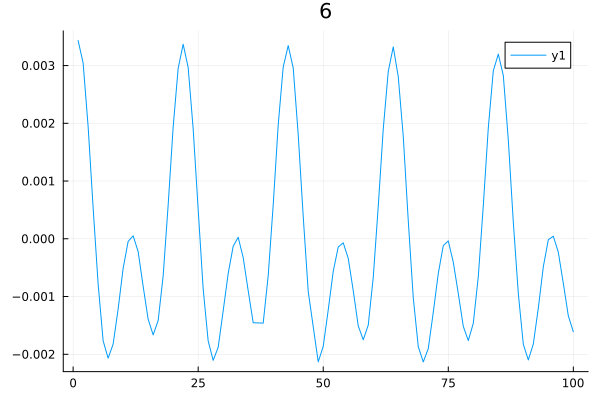

In [84]:
idx = rand(1:26)
plot(X_test[idx, :], title=idx)

┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516


╭────────┬────────────╮
│ Metric │      Value │
├────────┼────────────┤
│    MAE │ 0.00144885 │
│ NN_MAE │ 0.00127507 │
╰────────┴────────────╯


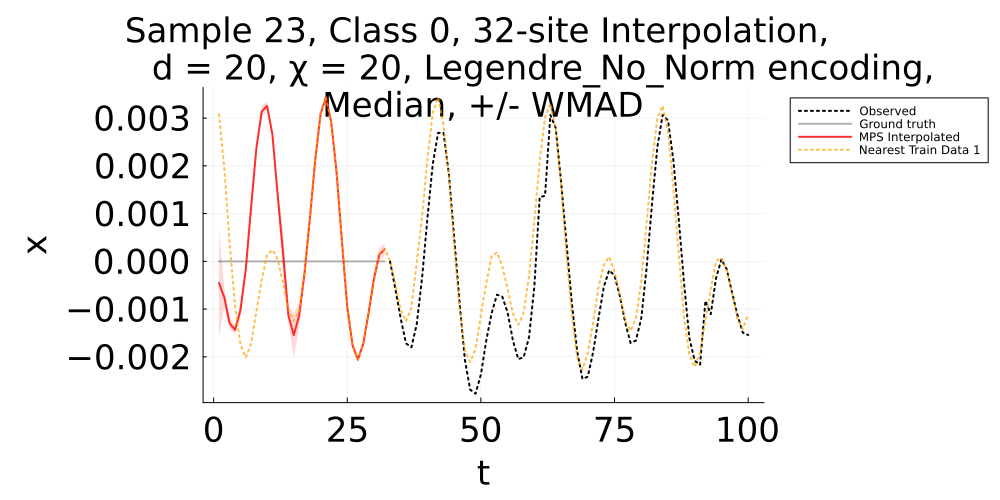

In [90]:
interp_sites = collect(1:32)
class = 0
stats, p1_ns = any_interpolate_median(fc, class, 23, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...,  xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    bottom_margin=10mm, 
    left_margin=10mm,
    xlabel="t")